# Entendimiento del Negocio - Contexto - Entrega 3

## 1. Nombre del Proyecto

**Clasificación de impago de tarjeta de credito de clientes de un banco**

---

## 2. Objetivo del Proyecto

Desarrollar y evaluar un modelo de clasificación que prediga la probabilidad de impago de los clientes de tarjetas de crédito de un banco, utilizando el dataset público “Default of Credit Card Clients” (UCI / Kaggle). El resultado apoyará la toma de decisiones de riesgo al identificar oportunamente clientes con alta probabilidad de incumplimiento. Lo anterior usando herramientas y conceptos propios de las metodologías agiles aplicadas a la ciencia de datos.

- **Fuente de datos**: [Default of Credit Card Clients (Kaggle)](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

---


## 3. Alcance del Proyecto


- **Datos:** dataset **Default of Credit Card Clients Dataset**de 30 000 registros y 23 variables.
  - **ID**: Identificador de cada cliente.
  - **LIMIT_BAL**: Monto de crédito otorgado en dólares NTD (dólar taiwanés), incluye crédito individual y familiar/suplementario.
  - **SEX**: Género (1 = masculino, 2 = femenino).
  - **EDUCATION**: Nivel educativo (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido).
  - **MARRIAGE**: Estado civil (1 = casado, 2 = soltero, 3 = otros).
  - **AGE**: Edad en años.
  - **PAY_0**: Estado de pago en septiembre de 2005 (–1 = pago puntual, 1 = retraso de un mes, 2 = retraso de dos meses, …, 8 = retraso de ocho meses, 9 = retraso de nueve meses o más).
  - **PAY_2**: Estado de pago en agosto de 2005 (misma escala).
  - **PAY_3**: Estado de pago en julio de 2005 (misma escala).
  - **PAY_4**: Estado de pago en junio de 2005 (misma escala).
  - **PAY_5**: Estado de pago en mayo de 2005 (misma escala).
  - **PAY_6**: Estado de pago en abril de 2005 (misma escala).
  - **BILL_AMT1**: Monto de la factura en septiembre de 2005 (dólares NTD).
  - **BILL_AMT2**: Monto de la factura en agosto de 2005 (dólares NTD).
  - **BILL_AMT3**: Monto de la factura en julio de 2005 (dólares NTD).
  - **BILL_AMT4**: Monto de la factura en junio de 2005 (dólares NTD).
  - **BILL_AMT5**: Monto de la factura en mayo de 2005 (dólares NTD).
  - **BILL_AMT6**: Monto de la factura en abril de 2005 (dólares NTD).
  - **PAY_AMT1**: Monto del pago anterior en septiembre de 2005 (dólares NTD).
  - **PAY_AMT2**: Monto del pago anterior en agosto de 2005 (dólares NTD).
  - **PAY_AMT3**: Monto del pago anterior en julio de 2005 (dólares NTD).
  - **PAY_AMT4**: Monto del pago anterior en junio de 2005 (dólares NTD).
  - **PAY_AMT5**: Monto del pago anterior en mayo de 2005 (dólares NTD).
  - **PAY_AMT6**: Monto del pago anterior en abril de 2005 (dólares NTD).
  - **default.payment.next.month**: Indicador de impago el mes siguiente (1 = sí, 0 = no).


- **Fases TDSP** alineadas con la rúbrica del curso:
  1. Entendimiento del negocio y carga de datos.
  2. Preprocesamiento y Análisis exploratorio de datos (EDA).
  3. Modelamiento y Extracción de características.
  4. Despliegue (prototipo local/API) y gestión de versiones.
  5. Evaluación final y presentación.
- **Herramientas** a usar:
  - **Git** → versionamiento de código.
  - **DVC** → versionamiento de datos.
  - **MLflow** → seguimiento de experimentos y modelos.
  - Python, pandas, scikit‑learn, Jupyter, FastAPI (opcional para demo).
- **Entregables** por fase:

| Fase | Entregables obligatorios (según rúbrica) |
|------|-------------------------------------------|
| 1 | Marco de proyecto, código de carga de datos, diccionario de datos |
| 2 | Código de preprocesamiento/EDA, resumen estadístico, visualizaciones |
| 3 | Código de extracción de características, notebooks de modelamiento, reporte de línea base y modelo final (MLflow) |
| 4 | Código de despliegue (prototipo), documentación de despliegue y entorno |
| 5 | Código de evaluación, interpretación de resultados, video de presentación |
| 6 | **Entrega final** |

- **Criterios de éxito (baseline):** AUC‑ROC ≥ 0.78, Recall ≥ 0.60 en el dataset de prueba.

---

## 3.1. Excluye:

- Integrar datos adicionales (p. ej. perfiles transaccionales).
- Despliegue productivo en la nube.
- Análisis financiero detallado más allá de métricas de clasificación.

---

## 3.2 Carga de los datos




---

### Librerías

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# División de datos, métricas y validación
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, accuracy_score
)

# Codificación y pre-procesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelo
from xgboost import XGBClassifier

# Persistencia
import joblib


### Carga

In [2]:
df = pd.read_csv( r"./data/UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Se ha cargado el CSV con éxito y se ha comprobado que todas las columnas están presentes**


## 4. Metodología

Se adoptará el marco **TDSP** (Team Data Science Process) complementado con prácticas Ágiles y las herramientas del curso:

- **Plan** → Backlog en GitHub Projects, sprints semanales.
- **Develop** → Git + DVC para rastrear notebooks, código y datasets.
- **Build** → MLflow para experimentos, métricas y artefactos de modelos.
- **Deploy** → Prototipo local o API FastAPI..
- **Operate** → Métricas de evaluación y reflexiones sobre el modelo resultante. Reflexionando sobre cómo podría cambiar la relación entre variables y el resultado (impago) en el tiempo, y cómo esto afectaría la vigencia del modelo entrenado.

A continuación se muestra el ciclo de vida del proceso TDSP utilizado en el proyecto:

> ![Ciclo de vida TDSP](./Imagenes/metodologia.png)



---



## 5. Cronograma

| Fase TDSP | Entregables clave | Fechas |
|-----------|------------------|--------|
| 1 – Entendimiento & Carga | • Marco del proyecto  <br>• Notebook de carga de datos  <br>• Diccionario de datos | 26 jun → 03 jul |
| 2 – Preprocesamiento & EDA | • Código de limpieza y EDA  <br>• Resumen estadístico y visualizaciones clave | 04 → 11 jul |
| 3 – Modelamiento & Features | • Pipeline de ingeniería de características  <br>• Modelos baseline y mejorados rastreados en MLflow  <br>• Reporte comparativo | 12 → 18 jul |
| 4 – Despliegue (Prototipo) | • Script/API  <br>• Documentación de infraestructura local  <br>• Configuración de DVC | 29 → 25 jul |
| 5 – Evaluación & Entrega final | • Notebook de evaluación en *hold‑out/particiones entrenamiento prueba*  <br>• Interpretación de resultados y limitaciones  <br>• Video (≤ 5 min) con presentación del proyecto | 28 jul |



---

## 6. Equipo del Proyecto

| Nombre | Rol | Responsabilidades |
|--------|-----|------------------|
| Juan Felipe Caro Monroy | Líder del equipo| Dirección general, código, experimentos, presentación |
| Miguel Ángel Naranjo | Líder del proyecto | Guía técnica,  código, experimentos, presentación |
| Edwin David García| Científico de datos| Guía técnica, código, experimentos, presentación |



---

## 7. Presupuesto

Sin presupuesto monetario, se utilizan recursos gratuitos (Kaggle, GitHub, DVC remotos locales, MLflow local).

---

## 8. Stakeholders

- **Profesor(a) del módulo** – Supervisor académico y evaluador.
- **Tutor/monitor del módulo** – Feedback  durante revisiones y evaluador.
- **Cliente hipotetico de Riesgo Bancario** 

---



## 9. Aprobaciones




| Nombre | Cargo | Firma | Fecha |
|--------|-------|-------|-------|
| Jorge Eliécer Camargo Mendoza | Docente | ____________________ | ___ / ___ / 2025 |
| Juan Sebastian Malagón Torres | Tutor/Monitor | ____________________ | ___ / ___ / 2025 |

# **ENTREGA 3**

## Introducción - Modelamiento

Para la etapa de modelamiento se propone un laboratorio donde se experimentará y evaluará con cuatro modelos diferentes que se ajustan a la tarea de clasificación. La tarea consiste, en esencia, en predecir —a partir de un conjunto de variables independientes que describen la salud financiera de un cliente— si este realizará o no el pago de su crédito, representado por una variable dependiente binaria.

A continuación, se presenta una breve descripción de los modelos seleccionados para el experimento:

### Regresión Logística

La regresión logística es un modelo ampliamente utilizado para clasificación binaria debido a su simplicidad, interpretabilidad y eficiencia. Es ideal como modelo de línea base en problemas de clasificación, ya que es el método más sencillo y fácil de implementar, permitiendo establecer una referencia inicial de desempeño para comparar con modelos más complejos. Además, permite entender la relación entre las variables independientes y la probabilidad de pertenecer a una clase, generando coeficientes que indican la dirección e intensidad de esas relaciones. Es computacionalmente ligera, ofrece probabilidades como salida y, con técnicas de regularización (como L1 o L2), puede manejar problemas de multicolinealidad y mejorar la generalización del modelo.

### Máquinas de Vectores de Soporte (SVM)

SVM es una técnica poderosa para clasificación binaria que destaca por su capacidad para encontrar el hiperplano óptimo que separa las clases con el mayor margen posible. Es especialmente útil en problemas multivariados con relaciones no lineales, gracias al uso de funciones *kernel* que transforman los datos para facilitar la separación. SVM es robusta frente al sobreajuste, eficiente en espacios de alta dimensión y no requiere suposiciones fuertes sobre la distribución de los datos, lo que la convierte en una opción sólida cuando se busca precisión en la predicción más que interpretabilidad.

### Random Forest

Random Forest es un modelo de aprendizaje supervisado basado en ensambles de árboles de decisión, ampliamente utilizado en tareas de clasificación por su capacidad para manejar datos complejos y relaciones no lineales sin necesidad de preprocesamiento intensivo. Este modelo construye múltiples árboles de decisión (cada uno entrenado con diferentes subconjuntos aleatorios de los datos y variables), y combina sus predicciones mediante votación para obtener una clasificación final más robusta y generalizable.  
Además, ofrece herramientas internas como la importancia de características y la estimación del error *out-of-bag* que ayudan a entender el comportamiento del modelo y su capacidad de generalización. Es escalable, tolerante al ruido y funciona bien sin una gran necesidad de escalamiento o normalización de datos. Esto lo convierte en un candidato ideal para tareas críticas como la predicción de incumplimiento de crédito, donde es esencial capturar patrones complejos que podrían ser indicativos de riesgo.

### XGBoost (Extreme Gradient Boosting)

XGBoost es un modelo basado en *gradient boosting* que ha demostrado un rendimiento sobresaliente en tareas de clasificación y competición de ciencia de datos. Su fuerza radica en la combinación secuencial de árboles de decisión débiles que corrigen los errores de sus predecesores, optimizando una función de pérdida con regularización para evitar el sobreajuste. Es altamente eficiente computacionalmente, permite paralelización y manejo de valores faltantes, y ofrece herramientas como la importancia de variables y visualización de árboles. Su flexibilidad lo hace adecuado para capturar relaciones no lineales complejas, y es especialmente útil en contextos como el crédito, donde se requiere detectar señales sutiles de incumplimiento en conjuntos de datos desequilibrados.


## Modelos

### Regresión Logistica Y Maquina de soporte vectorial (SVM)

#### Carga de los datos 

In [ ]:
import kagglehub
import pandas as pd
import pyarrow as pyw

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

# Cargue de la data en un dataframe
df = pd.read_csv(path + "/UCI_Credit_Card.csv",dtype_backend="pyarrow")

Path to dataset files: /kaggle/input/default-of-credit-card-clients-dataset


#### Limpieza y transformación de los datos 

In [ ]:
#Analisis de correlacion para la variable objetivo
#El objetivo es poder determinar las 8 caracteristicas que tengan la mejor corelacion con la variable objetivo
#para el entrenamiento del modelo
correlacion = df.corr()
corr_v_obj = correlacion.iloc[-1][:-1].sort_values(ascending=False)
var_trainable = corr_v_obj.iloc[:8]
print(var_trainable.index)

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION',
       'AGE'],
      dtype='object')


In [ ]:
#Cargue de librerias necesarias para la ejecucion del experimento
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Se fija el valor para el entrenamiento de los modelos
random_state = 42

# Separacion de dataframe original en caracteristicas y label para la probabilidad de pago
# Se retiran solo los campos objetivo y el campo ID que no aportaba al entrenamiento del modelo
data_features = df.drop(columns=['ID','default.payment.next.month'])
data_label = df.iloc[:,[-1]]

# Separación en variables de entrenamiento y testing
data_features_train, data_features_test, data_label_train, data_label_test = train_test_split(data_features, data_label, test_size=0.2
                                                                                              ,stratify=data_label, random_state=random_state)

#### Regresión logistica 1 (Todas las variables )

In [ ]:
# Entrenamiento del modelo de regresion logistica con el full de las variables independientes
# Adicional se parametriza que se balancee los pesos para el modelo
model = LogisticRegression(random_state=random_state,class_weight='balanced')
model.fit(data_features_train, data_label_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

#### Regresión logistica 2 ( variables correlacionadas)

In [ ]:
#Probar el modelo solo con las caracteristicas mas importantes por la matriz de correlación
# Separacion de dataframe original en caracteristicas y label para la probabilidad de pago
data_features_2 = df.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION',
       'AGE']]
data_label_2 = df.iloc[:,[-1]]

# Separación en variables de entrenamiento y testing
data_features_train_2, data_features_test_2, data_label_train_2, data_label_test_2 = train_test_split(data_features_2, data_label_2, test_size=0.2
                                                                                              ,stratify=data_label, random_state=random_state)

#Enrenamiento de model  de regresion logistica con variable dependientes seleccionadas
model_2 = LogisticRegression(random_state=random_state,class_weight='balanced')
model_2.fit(data_features_train_2, data_label_train_2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', random_state=42)

#### Test y métricas de modelos de regresión logistica

In [ ]:
# Evaluacion de modelos
# Predicción para el modelo con full variables
y_pred = model.predict(data_features_test)
# Predicción para el modelo con variables seleccionadas
y_pred_2 = model_2.predict(data_features_test_2)

# Salida de reporte de clasificación y el accuracy_score
print("Modelo N°1 con todas las caracteristicas")
print(classification_report(data_label_test, y_pred))
print(accuracy_score(data_label_test, y_pred))
print('\n')
print("Modelo N°2 con caracteristicas seleccionadas")
print(classification_report(data_label_test_2, y_pred_2))
print(accuracy_score(data_label_test_2, y_pred_2))

Modelo N°1 con todas las caracteristicas
              precision    recall  f1-score   support

         0.0       0.86      0.49      0.62      4673
         1.0       0.28      0.72      0.41      1327

    accuracy                           0.54      6000
   macro avg       0.57      0.60      0.51      6000
weighted avg       0.73      0.54      0.57      6000

0.5368333333333334


Modelo N°2 con caracteristicas seleccionadas
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      4673
         1.0       0.45      0.53      0.49      1327

    accuracy                           0.75      6000
   macro avg       0.65      0.67      0.66      6000
weighted avg       0.77      0.75      0.76      6000

0.75


In [ ]:
#Evaluacion del modelo SVM para clasificación.
# En este apartado ya pasamos a un modelo mas robusto para la determinacion de la variable dependiente
# se usa SVM para clasificacion con balaceo de clases

#Cargue de libreria para el modelo de SVM
from sklearn.svm import SVC

# Separacion de dataframe original en caracteristicas y label para la probabilidad de pago
data_features_svc = df.drop(columns=['ID','default.payment.next.month'])
data_label_svc = df.iloc[:,[-1]]

# Separación en variables de entrenamiento y testing
data_features_train_svc, data_features_test_svc, data_label_train_svc, data_label_test_svc = train_test_split(data_features_2, data_label_2, test_size=0.2
                                                                                              ,stratify=data_label, random_state=random_state)

# Entrenamiento del modelo SVM
model_SVC = SVC(gamma='auto',random_state=random_state,class_weight='balanced')
model_SVC.fit(data_features_train_svc, data_label_train_svc)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Modelos SVM test y métricas

In [ ]:
# Evaluacion del modelo SVM
print("Modelo N°3 con caracteristicas seleccionadas -> SVC")
y_pred_svc = model_SVC.predict(data_features_test_svc)
print(classification_report(data_label_test_svc, y_pred_svc))
print(accuracy_score(data_label_test_svc, y_pred_svc))

Modelo N°3 con caracteristicas seleccionadas -> SVC
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      4673
         1.0       0.47      0.56      0.51      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000

0.7635


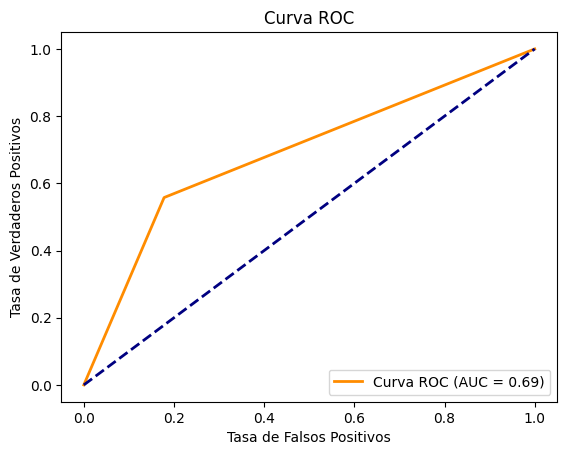

In [ ]:
# Curva AUC-ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(data_label_test_svc, y_pred_svc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Random Forest

#### Carga de los datos




---

In [ ]:
import pandas as pd

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "UCI_Credit_Card.csv"  # nombre exacto

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/default-of-credit-card-clients-dataset",
  file_path
)

print("First 5 records:", df.head())


/tmp/ipython-input-19-1678825860.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0      

**Se ha cargado el CSV con éxito y se ha comprobado que todas las columnas están presentes**

In [ ]:
import kagglehub
import pandas as pd
import pyarrow as pyw

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

# Cargue de la data en un dataframe
df = pd.read_csv(path + "/UCI_Credit_Card.csv",dtype_backend="pyarrow")

Path to dataset files: /kaggle/input/default-of-credit-card-clients-dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Variable objetivo
target = 'default.payment.next.month'

# Separar por tipo de variable
numericas = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

ordinales = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

categoricas = ['SEX', 'EDUCATION', 'MARRIAGE']

#### Limpieza y transformación

In [ ]:
!pip install mlflow pyngrok --quiet

In [ ]:
import mlflow
import os
import pandas as pd
from IPython.display import display

In [ ]:
command = """
mlflow server \
        --backend-store-uri sqlite:///tracking.db \
        --default-artifact-root file:mlruns \
        -p 5000 &
"""
get_ipython().system_raw(command)

In [ ]:
!pip install pyngrok

In [ ]:
token = "2zN54q8Fx1lRPRtmIaJNcqOI2jf_QvCiW8odkW8GgPE78dKh" # Agregue el token dentro de las comillas
os.environ["NGROK_TOKEN"] = token

In [ ]:
!ngrok authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
ngrok.connect(5000, "http")

<NgrokTunnel: "https://95dce526432b.ngrok-free.app" -> "http://localhost:5000">

In [ ]:
mlflow.set_tracking_uri("http://localhost:5000")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Renombrar la variable objetivo
df = df.rename(columns={"default.payment.next.month": "default"})

# Filtrar columnas relevantes
selected_cols = numericas + ordinales + categoricas + ['default']
df_model = df[selected_cols].copy()

# Separar variables y etiquetas
X = df_model.drop(columns='default')
y = df_model['default']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#2. Entrenamiento modelo Random Forest sin balance de datos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Entrenamiento del modelo
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predicciones
y_pred = model_rf.predict(X_test)

# Reporte de clasificación como diccionario
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Impresión legible del reporte
print("📊 Línea base - Random Forest")
print(classification_report(y_test, y_pred))  # Versión legible
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

📊 Línea base - Random Forest
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4673
         1.0       0.63      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000

Matriz de Confusión:
[[4392  281]
 [ 841  486]]
Accuracy: 0.8130


#### Balanceo de clases

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

base_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

La función class_weight en RandomForestClassifier (y en muchos otros modelos de clasificación de scikit-learn) sirve para manejar desequilibrios en la clase objetivo (es decir, cuando una clase aparece mucho más que otra):

- Las clases menos frecuentes reciben mayor peso.

-  Las clases más frecuentes reciben menor peso.

In [ ]:
# base_model = RandomForestClassifier(
#     class_weight='balanced',
#     random_state=42,
#     n_jobs=-1
# ). from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [15, 17],
#     'min_samples_leaf': [5, 8],
#     'max_features': ['sqrt']
# }

# grid = GridSearchCV(
#     base_model,
#     param_grid,
#     cv=3,
#     scoring='f1',
#     verbose=2,
#     n_jobs=-1
# )

# grid.fit(X_train, y_train)

# # Mejor modelo encontrado
# best_model = grid.best_estimator_
# print("🔍 Mejores hiperparámetros encontrados:")
# print(grid.best_params_)                   from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# import matplotlib.pyplot as plt
# import seaborn as sns

# y_pred = best_model.predict(X_test)
# y_prob = best_model.predict_proba(X_test)[:, 1]

# # Reporte clasificación
# print("📋 Reporte de clasificación:")
# print(classification_report(y_test, y_pred))

#### Ajuste de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [15, 17],
    'min_samples_leaf': [5, 8],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    base_model,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)


# Ejecutar todo dentro de un experimento en MLflow
with mlflow.start_run():
    # Entrenamiento
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Predicciones
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Logging de hiperparámetros
    mlflow.log_params(grid.best_params_)

    # Logging de métricas
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("roc_auc", roc_auc)

    # Logging del modelo
    mlflow.sklearn.log_model(best_model, "random_forest_model")

    # Mostrar reporte
    print("🔍 Mejores hiperparámetros encontrados:")
    print(grid.best_params_)
    print("📋 Reporte de clasificación:")
    print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


2025/07/18 02:21:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/18 02:21:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🔍 Mejores hiperparámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 100}
📋 Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      4673
         1.0       0.53      0.54      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000

🏃 View run defiant-hog-766 at: http://localhost:5000/#/experiments/1/runs/a46b9fb7cd804bfaa7a61fc87d43d646
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.4f}")

🎯 Accuracy: 0.7932


#### Matriz de confución y curva ROC

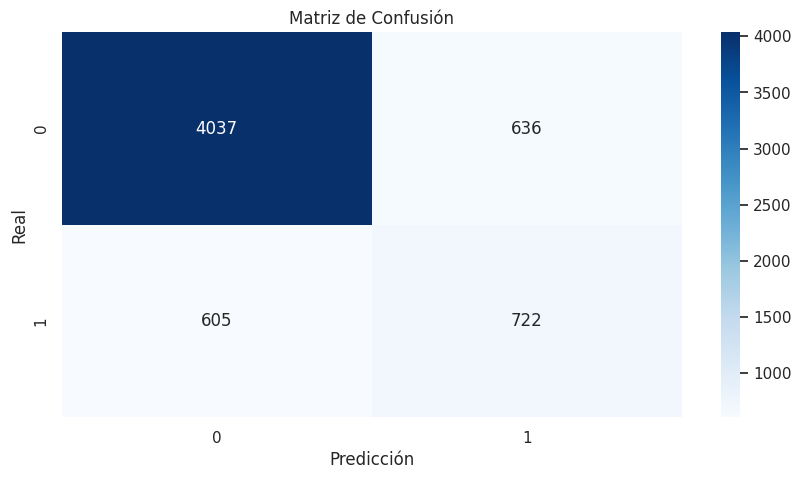

🎯 Accuracy: 0.7932


In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

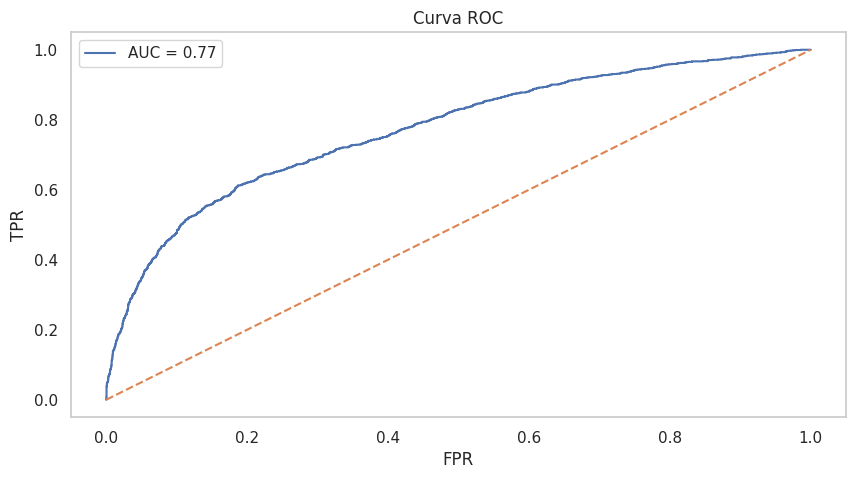

In [ ]:
# AUC-ROC
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.title("Curva ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

#### Análisis e interpretación


- La métrica AUC-ROC de 0.77 sugiere que el modelo tiene buena capacidad discriminativa, mejor que el azar, pero no excelente.

- La clase mayoritaria (0 - No incumple) tiene una excelente performance (f1 = 0.87).

- Sin embargo, la clase minoritaria (1 - Incumple) tiene un desempeño considerablemente inferior (f1 = 0.54), lo que sugiere que el modelo sigue teniendo dificultades para identificar correctamente a los clientes que incumplen.

- Se utilizaron hiperparámetros razonables para limitar la complejidad del modelo (min_samples_split, min_samples_leaf), evitando el sobreajuste.

- max_depth=None permite que los árboles crezcan hasta que se cumpla algún otro criterio, lo que combinado con las restricciones anteriores ayuda a mantener un buen balance entre sesgo y varianza.

#### Conclusiones Random Forest

- Random Forest es un modelo sólido para esta tarea, con un buen desempeño general y AUC aceptable, pero sufre en la predicción de la clase minoritaria, que es precisamente la de mayor interés en problemas de crédito.

- Aunque se aplicó class_weight='balanced', el desbalance sigue afectando el rendimiento sobre la clase positiva. Para mejorar:

-  Se pueden probar técnicas de re-muestreo (SMOTE, undersampling). O bien ajustar el umbral de clasificación manualmente para mejorar recall en la clase 1.

-  El proceso de optimización fue bien realizado, logrando un modelo razonablemente afinado sin sobreajuste evidente.

### XGBOOST

#### Carga de los datos

In [23]:
df_2 = pd.read_csv( r"./data/UCI_Credit_Card.csv")

In [22]:
df_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [24]:
df_2["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [26]:
df_2["SEX"].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [27]:
df_2["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

#### Limpieza y transformación

Se cambia el nombre de la variable 'default.payment.next.month' por target teniendo en cuenta que es nuestra variable objetivo binaria a predecir


In [5]:
# ------------- 2. Limpieza & transformación -------
# a) Target – renombra por comodidad
df.rename(columns={"default.payment.next.month": "target"}, inplace=True)

De acuerdo con la descripción del dataset, algunas categorías presentes en las variables `EDUCATION` y `MARRIAGE` no coinciden con los valores esperados según la documentación. Al analizar la distribución de estas variables con `value_counts()`, se observan valores como `0`, `5` y `6` en `EDUCATION`, y `0` en `MARRIAGE`, los cuales no tienen una interpretación definida o representan datos desconocidos. Para evitar ambigüedad y mejorar la calidad del modelo, estos valores se agrupan en nuevas categorías genéricas: `4` en `EDUCATION` y `3` en `MARRIAGE`, ambas representando la categoría *"other"*.


In [6]:
# b) Tratamiento de categorías fuera de rango
df["EDUCATION"] = df["EDUCATION"].replace({0:4, 5:4, 6:4}).astype("category")
df["MARRIAGE"]  = df["MARRIAGE"].replace({0:3}).astype("category")
df["SEX"]       = df["SEX"].astype("category")

- Se elimina de la matriz de entrenamiento la variable objetivo.
- Se asigna a y la variable objetivo.

In [7]:

# c) Variables predictoras
X = df.drop(columns=["ID", "target"])
y = df["target"]

In [8]:
cat_cols  = X.select_dtypes("category").columns.to_list()
num_cols  = X.select_dtypes(exclude="category").columns.to_list()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

Se realiza la partición del dataset entre "entrenamiento" y "test" en una proporción de 80 % y 20 % resepectivamente.

In [9]:
# ------------- 3. División del conjunto -----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)


- Se determina la variable `ratio`, la cual consiste en el cociente entre la cantidad de instancias de la clase 0 (clientes que **no incumplen**) y la clase 1 (clientes que **sí incumplen**) en el conjunto de entrenamiento.

- Este ratio se utiliza como valor del parámetro `scale_pos_weight` en XGBoost, el cual permite **compensar el desbalance de clases**, dándole mayor peso a los errores en la clase minoritaria (morosos), y así mejorar el recall del modelo.

- Se definen también otros hiperparámetros iniciales de acuerdo con la naturaleza del problema, como por ejemplo:
  - `objective="binary:logistic"`: se usa para clasificación binaria.
  - `eval_metric="auc"`: se escoge AUC como métrica de evaluación por ser más robusta ante desbalance de clases.
  - `n_estimators`, `max_depth`, `learning_rate`, entre otros, se fijan como punto de partida antes de la optimización por búsqueda.


In [11]:
# ------------- 4. Modelo base ---------------------
ratio = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=ratio,
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", xgb_clf)
])

In [12]:

pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE']),
                                                 ('num', 'passthrough',
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [13]:

# ------------- 5. Evaluación -----------------------
y_pred   = pipe.predict(X_test)
y_proba  = pipe.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000

AUC: 0.7762711473550294


#### Ajuste de hiperparametros

In [14]:
# ------------- 6. Ajuste de hiperparámetros (opcional) ----
param_grid = {
    "model__n_estimators": [300, 500, 700],
    "model__max_depth":   [3, 4, 5],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample":   [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipe, param_grid,
                    scoring="roc_auc",
                    cv=cv,
                    n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)
print("Mejor AUC validación:", grid.best_score_)
print("Mejores hiperparámetros:", grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejor AUC validación: 0.7846919609057341
Mejores hiperparámetros: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 700, 'model__subsample': 0.8}


#### Test y métricas

In [18]:
best_model = grid.best_estimator_
# ------------- 7. Métricas con mejores hiperparámetros -------------------
best_pred  = best_model.predict(X_test)
best_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Métricas con modelo optimizado ===")
print(classification_report(y_test, best_pred))
print("Accuracy:", accuracy_score(y_test, best_pred))
print("ROC AUC:", roc_auc_score(y_test, best_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, best_pred))


=== Métricas con modelo optimizado ===
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.78      6000

Accuracy: 0.7648333333333334
ROC AUC: 0.7800833114150765
Confusion matrix:
 [[3765  908]
 [ 503  824]]


#### Matriz de confusión y curva ROC

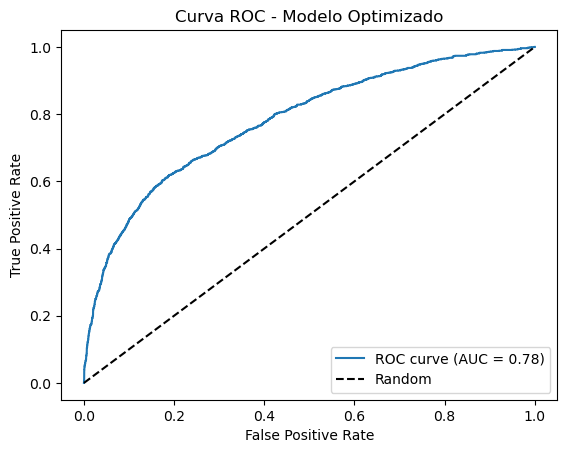

In [ ]:
# -------------------- 8. Curva ROC ---------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, best_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, best_proba):.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Optimizado')
plt.legend(loc='lower right')
plt.show()

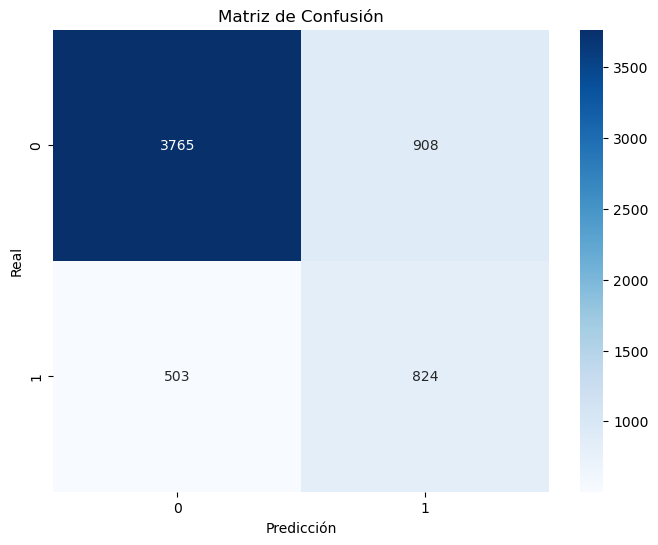

In [ ]:
# -------------------- 9. Matriz de Confusión ----------------------------------
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()


## Comparación de modelos

| Modelo                                    | Accuracy | Precision (1) | Recall (1) | F1-score (1) | ROC AUC |
|-------------------------------------------|----------|----------------|-------------|---------------|---------|
| Regresión Logística (todas las vars)      | 0.537    | 0.28           | 0.72        | 0.41          | —       |
| Regresión Logística (vars seleccionadas)  | 0.750    | 0.45           | 0.53        | 0.49          | —       |
| SVM (vars seleccionadas)                  | 0.764    | 0.47           | 0.56        | 0.51          | 0.690   |
| Random Forest (baseline)                  | 0.813    | 0.63           | 0.37        | 0.46          | —       |
| Random Forest (optimizado)                | 0.790    | 0.53           | 0.54        | 0.54          | 0.700   |
| XGBoost (baseline)                        | 0.760    | 0.47           | 0.62        | 0.53          | 0.776   |
| XGBoost (optimizado)                      | 0.765    | 0.48           | 0.62        | 0.54          | 0.780   |


## Insights Relevantes

- Las métricas corresponden a la clase positiva (1), que representa a los clientes que no pagarán su crédito.

- Los modelos Random Forest y XGBoost (con tuning) ofrecen un balance superior entre recall y precisión para la clase minoritaria.

- ROC AUC disponible solo en los modelos optimizados.

## Comparación general


- Modelos como la **regresión logística completa** priorizan el recall pero sacrifican mucho la precisión ademas de tener recall tambien bajo
- **Random Forest base** alcanza el mayor accuracy, pero su bajo recall sobre la clase 1 lo hace menos confiable para este problema.
- **SVM y Random Forest optimizado** ofrecen un balance más adecuado.
- Finalmente, **XGBoost con ajuste de hiperparámetros destaca como el modelo con mejor desempeño global**, ya que logra:
  - Buen accuracy general (0.765)
  - Balance entre precisión (0.48) y recall (0.62)
  - **Mayor AUC (0.780)**, lo que demuestra su capacidad de distinguir correctamente entre clases en distintos umbrales de decisión.

## **Conclusión**:  
Dado el objetivo de anticipar incumplimientos con bajo margen de error, el modelo más robusto para esta tarea es **XGBoost optimizado**, al ofrecer un equilibrio entre sensibilidad, precisión y desempeño general.